# Midterm Project (YOLO): Implementing Object Detection on a Dataset

## Selection of Dataset and Algorithm
* Each student will choose a dataset suitable for object detection tasks. The dataset can be from publicly available sources **(e.g., COCO, PASCAL VOC)** or one they create.
* Select an object detection algorithm to apply to the chosen dataset. Possible algorithms include:
  * **YOLO (You Only Look Once)**: A real-time deep learning-based approach.
  * **SSD (Single Shot MultiBox Detector)**: A deep learning method balancing speed and accuracy.

### Dataset Information

The dataset utilized for this midterm activity is the Oxford-IIIT Pet Dataset, developed by the Visual Geometry Group at Oxford. This dataset consists of 37 categories of pet images, with approximately 200 images per class. The images exhibit significant variations in scale, pose, and lighting conditions. Each image is accompanied by detailed annotations, including breed classification, head region of interest (ROI), and pixel-level trimap segmentation.

The dataset includes 12 cat breeds and 25 dog breeds, listed as follows:

**Cat Breeds**:
- Abyssinian
- Bengal
- Birman
- Bombay
- British Shorthair
- Egyptian Mau
- Maine Coon
- Persian
- Ragdoll
- Russian Blue
- Siamese
- Sphynx

**Dog Breeds**:
- American Bulldog
- American Pit Bull Terrier
- Basset Hound
- Beagle
- Boxer
- Chihuahua
- English Cocker Spaniel
- English Setter
- German Shorthaired
- Great Pyrenees
- Havanese
- Japanese Chin
- Keeshond
- Leonberger
- Miniature Pinscher
- Newfoundland
- Pomeranian
- Pug
- Saint Bernard
- Samoyed
- Scottish Terrier
- Shiba Inu
- Staffordshire Bull Terrier
- Wheaten Terrier
- Yorkshire Terrier

Parkhi, O. M., Vedaldi, A., Zisserman, A., & Jawahar, C. V. (2012). Cats and dogs. In *Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition*. Institute of Electrical and Electronics Engineers.

## Implementation

### Data Preparation

- Preprocess the dataset by resizing images, normalizing pixel values, and, if necessary, labeling bounding boxes for objects.

In [ ]:
# Import the Roboflow library for interacting with the API
from roboflow import Roboflow

rf = Roboflow(api_key="TUXckiOYdWfPKbzjriHg")
project = rf.workspace("feature-extraction-p1jos").project("cat-dog-breeds")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cat-&-Dog-Breeds-1 in yolov9:: 100%|██████████| 20012/20012 [00:03<00:00, 5505.59it/s]


### Model Building

- Implement the selected object detection algorithm using appropriate libraries.

In [ ]:
# Import the YOLO class from the ultralytics library to utilize YOLO object detection capabilities
from ultralytics import YOLO

# Load a pre-trained YOLO model using the specified weight file ('yolov9m.pt')
yolo_model = YOLO('yolov9m.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 39.1M/39.1M [00:00<00:00, 155MB/s]


### Training the Model

- Use the training data to train the object detection model. For deep learning methods, fine-tune hyperparameters (e.g., learning rate, batch size, epochs) to optimize model performance.

In [ ]:
# Train the YOLO model using the specified parameters
yolo_model.train(
    data="/content/Cat-&-Dog-Breeds-1/data.yaml", # Path to the dataset configuration file (defines classes and dataset splits)
    epochs=25,                                    # Number of training epochs (iterations over the entire dataset)
    batch=16,                                     # Batch size for training (number of images processed simultaneously)
    imgsz=640,                                    # Input image size (dimensions for resizing images before training)
    lr0=0.01,                                     # Initial learning rate for the optimizer
)

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9m.pt, data=/content/Cat-&-Dog-Breeds-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 17.7MB/s]


Overriding model.yaml nc=80 with nc=37

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1    171648  ultralytics.nn.modules.block.RepNCSPELAN4    [64, 128, 128, 64, 1]         
  3                  -1  1    276960  ultralytics.nn.modules.block.AConv           [128, 240]                    
  4                  -1  1    629520  ultralytics.nn.modules.block.RepNCSPELAN4    [240, 240, 240, 120, 1]       
  5                  -1  1    778320  ultralytics.nn.modules.block.AConv           [240, 360]                    
  6                  -1  1   1414080  ultralytics.nn.modules.block.RepNCSPELAN4    [360, 360, 360, 180, 1]       
  7                  -1  1   1556160  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]


AMP: checks passed ✅


train: Scanning /content/Cat-&-Dog-Breeds-1/train/labels... 7000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7000/7000 [00:04<00:00, 1672.94it/s]


train: New cache created: /content/Cat-&-Dog-Breeds-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Cat-&-Dog-Breeds-1/valid/labels... 2000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [00:01<00:00, 1102.39it/s]

val: New cache created: /content/Cat-&-Dog-Breeds-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000244, momentum=0.9) with parameter groups 149 weight(decay=0.0), 156 weight(decay=0.0005), 155 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      8.49G      1.059      3.234      1.487         17        640: 100%|██████████| 438/438 [05:03<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:36<00:00,  1.72it/s]

                   all       2000       2003      0.451      0.567      0.504      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      8.39G      1.015      2.086      1.391         23        640: 100%|██████████| 438/438 [04:57<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]

                   all       2000       2003      0.552      0.588      0.618      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      8.43G       1.02      1.836      1.378         16        640: 100%|██████████| 438/438 [04:53<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.83it/s]

                   all       2000       2003      0.706      0.662      0.747      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      8.36G     0.9986      1.681       1.35         13        640: 100%|██████████| 438/438 [04:52<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]

                   all       2000       2003       0.63      0.671      0.729      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      8.39G     0.9682      1.529      1.323         21        640: 100%|██████████| 438/438 [04:52<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]

                   all       2000       2003      0.724      0.762      0.831      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      8.37G     0.9203      1.361      1.282         17        640: 100%|██████████| 438/438 [04:53<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.80it/s]

                   all       2000       2003      0.763      0.781      0.854      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       8.4G     0.9031      1.262      1.267         21        640: 100%|██████████| 438/438 [04:53<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]

                   all       2000       2003      0.805       0.81      0.894       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      8.37G     0.8735       1.17      1.242         17        640: 100%|██████████| 438/438 [04:53<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.83it/s]

                   all       2000       2003      0.834      0.824       0.91      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      8.39G     0.8482      1.086      1.223         18        640: 100%|██████████| 438/438 [04:52<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.83it/s]

                   all       2000       2003      0.864       0.85      0.927      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      8.37G     0.8344      1.023      1.213         21        640: 100%|██████████| 438/438 [04:52<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.84it/s]

                   all       2000       2003      0.872      0.881      0.945      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      8.39G     0.8023      0.942      1.188         13        640: 100%|██████████| 438/438 [04:52<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]

                   all       2000       2003        0.9      0.883      0.951      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      8.37G     0.7933     0.9129      1.186         14        640: 100%|██████████| 438/438 [04:52<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]

                   all       2000       2003      0.903      0.907       0.96      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      8.38G     0.7607     0.8461      1.162         12        640: 100%|██████████| 438/438 [04:52<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]

                   all       2000       2003      0.904      0.899      0.958      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      8.38G     0.7567      0.811      1.158         15        640: 100%|██████████| 438/438 [04:52<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.83it/s]

                   all       2000       2003      0.931      0.906      0.967       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      8.39G     0.7363     0.7673      1.145         18        640: 100%|██████████| 438/438 [04:50<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:33<00:00,  1.85it/s]

                   all       2000       2003       0.94      0.922      0.972       0.83


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      8.37G     0.5981     0.4401      1.072          7        640: 100%|██████████| 438/438 [04:50<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:35<00:00,  1.79it/s]

                   all       2000       2003      0.937       0.92      0.976      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      8.39G     0.5757     0.3971      1.055          8        640: 100%|██████████| 438/438 [04:50<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.83it/s]

                   all       2000       2003      0.959      0.939      0.979      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      8.37G     0.5498     0.3632      1.036          8        640: 100%|██████████| 438/438 [04:50<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.83it/s]

                   all       2000       2003      0.962      0.953      0.985      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       8.4G     0.5307     0.3304      1.016          8        640: 100%|██████████| 438/438 [04:49<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.84it/s]

                   all       2000       2003      0.966      0.956      0.985      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      8.37G     0.5105     0.3055      1.008          8        640: 100%|██████████| 438/438 [04:49<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:33<00:00,  1.86it/s]

                   all       2000       2003      0.965      0.957      0.985      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      8.39G     0.5001     0.2874      1.001          8        640: 100%|██████████| 438/438 [04:50<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]

                   all       2000       2003      0.967      0.956      0.987      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      8.37G     0.4785     0.2693     0.9818          8        640: 100%|██████████| 438/438 [04:50<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.84it/s]

                   all       2000       2003      0.972      0.967      0.986      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       8.4G     0.4616     0.2501     0.9753          8        640: 100%|██████████| 438/438 [04:50<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.85it/s]

                   all       2000       2003      0.973       0.97      0.988      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      8.38G     0.4469     0.2349     0.9655          8        640: 100%|██████████| 438/438 [04:50<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:33<00:00,  1.86it/s]

                   all       2000       2003      0.981      0.969      0.989      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      8.39G     0.4333     0.2216     0.9591          8        640: 100%|██████████| 438/438 [04:50<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:35<00:00,  1.80it/s]

                   all       2000       2003      0.983      0.967      0.989      0.889



25 epochs completed in 2.315 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.9MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.9MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9m summary (fused): 374 layers, 20,039,743 parameters, 0 gradients, 76.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]


                   all       2000       2003      0.983      0.967      0.989      0.889
        cat-abyssinian         70         70      0.991      0.971      0.993      0.891
            cat-bengal         55         56      0.963      0.925      0.985       0.86
            cat-birman         50         50      0.933       0.94      0.982      0.882
            cat-bombay         41         41      0.999          1      0.995      0.881
 cat-british_shorthair         49         49      0.995      0.959      0.994      0.909
      cat-egyptian_mau         53         53      0.992      0.981      0.994       0.91
        cat-maine_coon         52         52      0.998      0.981      0.994      0.882
           cat-persian         50         50       0.98      0.993      0.995      0.896
           cat-ragdoll         57         58      0.948      0.934      0.969      0.878
      cat-russian_blue         47         47       0.97      0.979      0.993      0.908
           cat-siames

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ee7dd9fd960>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.

### Testing

- Evaluate the model on a test set to assess its detection capabilities. Ensure to capture edge cases where the model may struggle.

Please upload 6 more image(s).


Saving cat-british-shorthair.png to cat-british-shorthair.png
Please upload 5 more image(s).


Saving cat-persian.png to cat-persian.png
Please upload 4 more image(s).


Saving cat-siamese.png to cat-siamese.png
Please upload 3 more image(s).


Saving dog-great-pyreness.png to dog-great-pyreness.png
Please upload 2 more image(s).


Saving dog-keeshond.png to dog-keeshond.png
Please upload 1 more image(s).


Saving dog-pomeranian.png to dog-pomeranian.png
All 6 images uploaded successfully.

0: 640x640 1 cat-british_shorthair, 40.6ms
Speed: 6.0ms preprocess, 40.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 cat-persian, 40.4ms
Speed: 3.5ms preprocess, 40.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 cat-ragdoll, 40.5ms
Speed: 4.2ms preprocess, 40.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 dog-great_pyrenees, 35.0ms
Speed: 3.8ms preprocess, 35.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 dog-keeshond, 28.5ms
Speed: 3.4ms preprocess, 28.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 dog-keeshond, 1 dog-pomeranian, 28.4ms
Speed: 3.5ms preprocess, 28.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


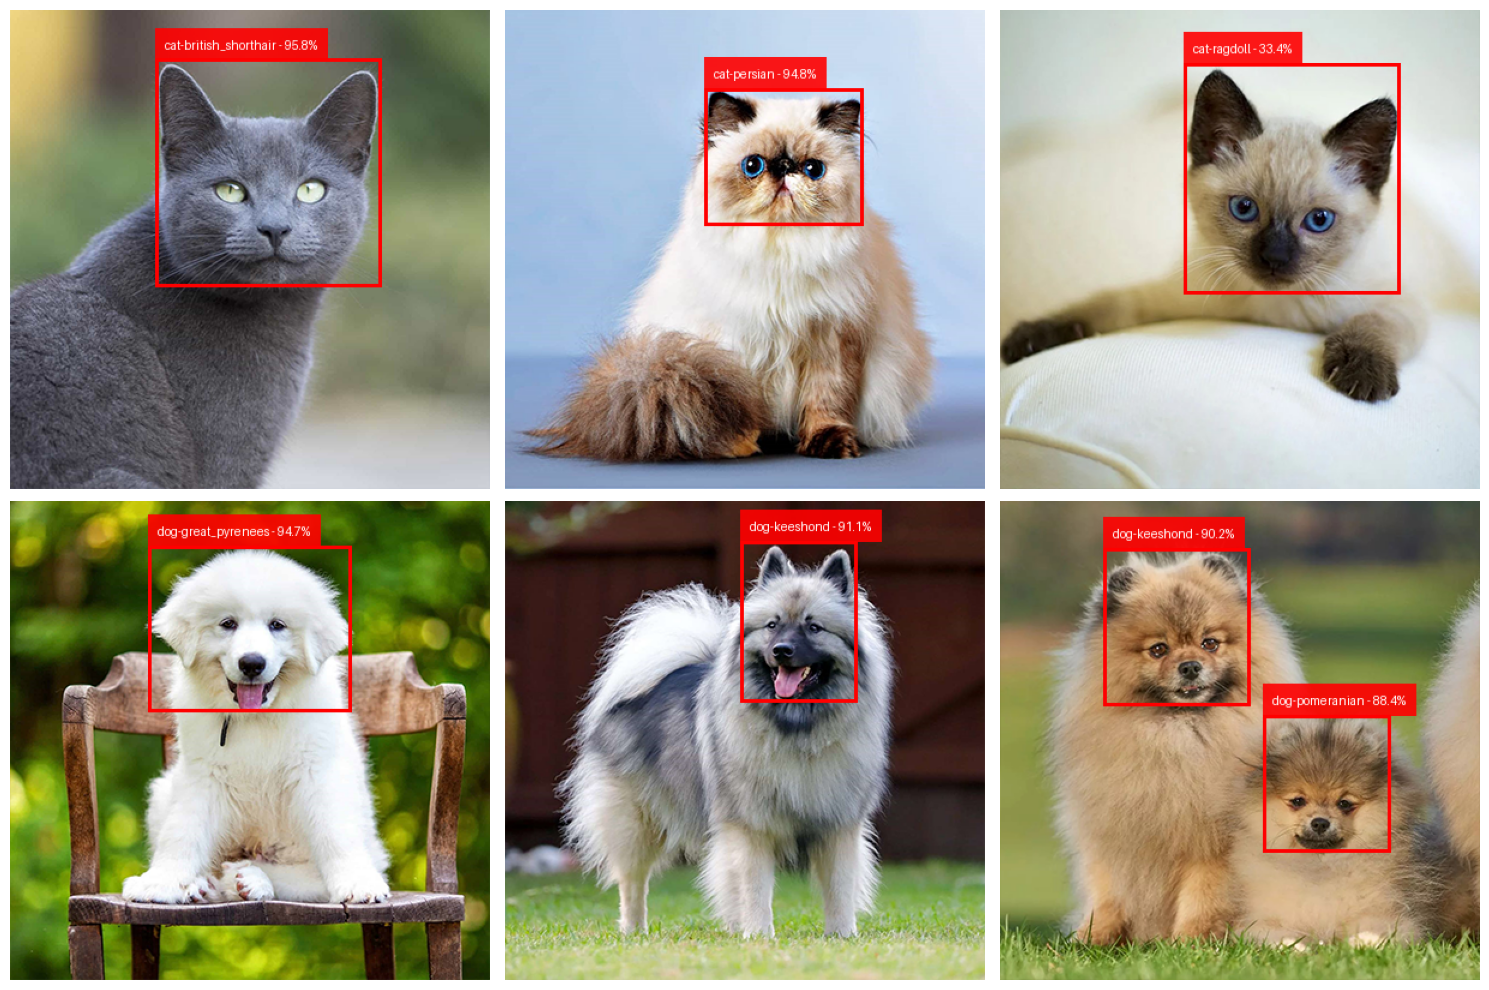


Performance Metrics:
-------------------
Image Name: cat-british-shorthair.png
Total Detections: 1
High Confidence Detections (>50%): 1
Average Confidence: 95.80%
Detection Time: 56.91ms

Class Distribution:
--------------------
cat-british_shorthair: 1

Performance Metrics:
-------------------
Image Name: cat-persian.png
Total Detections: 1
High Confidence Detections (>50%): 1
Average Confidence: 94.75%
Detection Time: 53.85ms

Class Distribution:
--------------------
cat-persian: 1

Performance Metrics:
-------------------
Image Name: cat-siamese.png
Total Detections: 1
High Confidence Detections (>50%): 0
Average Confidence: 33.42%
Detection Time: 52.73ms

Class Distribution:
--------------------
cat-ragdoll: 1

Performance Metrics:
-------------------
Image Name: dog-great-pyreness.png
Total Detections: 1
High Confidence Detections (>50%): 1
Average Confidence: 94.69%
Detection Time: 45.71ms

Class Distribution:
--------------------
dog-great_pyrenees: 1

Performance Metrics:
----

In [ ]:
from google.colab import files
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import torch
import cv2
import numpy as np
import io
import time
from collections import defaultdict

# Constants for visualization
BOX_THICKNESS = 3        # Thickness of the bounding box around detected objects
FONT_SIZE = 72           # Font size for labels
TEXT_PADDING = 8         # Padding for text background
BOX_COLOR = (255, 0, 0)  # Color of bounding boxes (red in RGB)
TEXT_BG_ALPHA = 230      # Transparency level of the text background

def upload_images():
    """
    Prompts the user to upload exactly 6 images via Google Colab's file uploader.

    Returns:
        dict: A dictionary containing image names as keys and file data as values.
    """
    uploaded_images = {}
    while len(uploaded_images) < 6:
        print(f"Please upload {6 - len(uploaded_images)} more image(s).")
        uploaded = files.upload()
        uploaded_images.update(uploaded)

    if len(uploaded_images) > 6:
        print("Too many images uploaded. Only the first 6 will be used.")
        uploaded_images = dict(list(uploaded_images.items())[:6])

    print("All 6 images uploaded successfully.")
    return uploaded_images

def crop_to_square(image):
    """
    Crops an image to a 1:1 aspect ratio by taking a centered square region.

    Args:
        image (PIL.Image.Image): The input image.

    Returns:
        PIL.Image.Image: The cropped image.
    """
    width, height = image.size
    size = min(width, height)
    left = (width - size) // 2
    top = (height - size) // 2
    right = left + size
    bottom = top + size
    return image.crop((left, top, right, bottom))

def calculate_metrics(results, detection_time, image_name):
    """
    Computes performance metrics for the object detection results.

    Args:
        results (object): YOLO detection results containing bounding box data.
        detection_time (float): Time taken for detection in seconds.
        image_name (str): Name of the processed image.

    Returns:
        dict: A dictionary of metrics including confidence levels, detection counts,
              and class distribution.
    """
    confidence_threshold = 0.5  # Minimum confidence threshold for high-confidence detections
    metrics = {
        'image_name': image_name,
        'total_detections': len(results.boxes.data),
        'high_confidence_detections': sum(1 for det in results.boxes.data if det[4] > confidence_threshold),
        'avg_confidence': 0,
        'detection_time': detection_time,
        'class_distribution': defaultdict(int)
    }

    if len(results.boxes.data) > 0:
        confidences = [det[4].item() for det in results.boxes.data]
        metrics['avg_confidence'] = sum(confidences) / len(confidences)

        # Calculate class distribution
        for det in results.boxes.data:
            class_name = results.names[int(det[5])]
            metrics['class_distribution'][class_name] += 1

    return metrics

def process_single_image(image_bytes, yolo_model, image_name):
    """
    Processes a single image for object detection, visualizes results, and calculates metrics.

    Args:
        image_bytes (bytes): Image data in bytes format.
        yolo_model (torch.nn.Module): Trained YOLO model for object detection.
        image_name (str): Name of the image being processed.

    Returns:
        tuple: A tuple containing the processed image (PIL.Image.Image) and detection metrics (dict).
    """
    # Load and preprocess the image
    image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    img_array = np.array(image)

    # Perform object detection and measure time
    start_time = time.time()
    results = yolo_model(img_array)[0]
    detection_time = time.time() - start_time

    # Compute metrics for the detections
    metrics = calculate_metrics(results, detection_time, image_name)

    # Draw bounding boxes and labels
    draw_image = image.convert('RGBA')
    draw = ImageDraw.Draw(draw_image)
    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", FONT_SIZE)
    except:
        font = ImageFont.load_default()

    for det in results.boxes.data:
        x1, y1, x2, y2, conf, cls = map(float, det)
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

        # Draw bounding box
        for i in range(BOX_THICKNESS):
            draw.rectangle([x1+i, y1+i, x2-i, y2-i], outline=BOX_COLOR)

        # Label with class name and confidence
        class_name = results.names[int(cls)]
        label_text = f"{class_name} - {conf*100:.1f}%"
        text_bbox = draw.textbbox((0, 0), label_text, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

        bg_x1 = x1
        bg_y1 = max(0, y1 - text_height - TEXT_PADDING * 2)
        bg_x2 = x1 + text_width + TEXT_PADDING * 2
        bg_y2 = y1

        overlay = Image.new('RGBA', draw_image.size, (0, 0, 0, 0))
        overlay_draw = ImageDraw.Draw(overlay)
        overlay_draw.rectangle([bg_x1, bg_y1, bg_x2, bg_y2], fill=(*BOX_COLOR, TEXT_BG_ALPHA))

        draw_image = Image.alpha_composite(draw_image, overlay)
        draw = ImageDraw.Draw(draw_image)
        draw.text((bg_x1 + TEXT_PADDING, bg_y1 + TEXT_PADDING), label_text, fill="white", font=font)

    processed_image = crop_to_square(draw_image.convert('RGB'))
    return processed_image, metrics

def display_grid(images):
    """
    Displays a list of images in a 3x2 grid layout using Matplotlib.

    Args:
        images (list): List of PIL.Image.Image objects to display.
    """
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    for ax, img in zip(axes.flat, images):
        ax.imshow(img)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

def print_metrics(metrics):
    """
    Prints detection metrics in a readable format.

    Args:
        metrics (dict): Dictionary containing detection metrics.
    """
    print("\nPerformance Metrics:")
    print("-------------------")
    print(f"Image Name: {metrics['image_name']}")
    print(f"Total Detections: {metrics['total_detections']}")
    print(f"High Confidence Detections (>50%): {metrics['high_confidence_detections']}")
    print(f"Average Confidence: {metrics['avg_confidence']*100:.2f}%")
    print(f"Detection Time: {metrics['detection_time']*1000:.2f}ms")

    print("\nClass Distribution:")
    print("-" * 20)
    for cls, count in metrics['class_distribution'].items():
        print(f"{cls}: {count}")

def process_images(yolo_model):
    """
    The main pipeline for processing images with YOLO.

    Steps:
        1. Upload images.
        2. Perform detection on each image.
        3. Display results in a grid.
        4. Print detailed metrics.

    Args:
        yolo_model (torch.nn.Module): Trained YOLO model for object detection.
    """
    uploaded_images = upload_images()
    processed_images = []
    metrics_list = []

    for filename, image_bytes in uploaded_images.items():
        processed_image, metrics = process_single_image(image_bytes, yolo_model, filename)
        processed_images.append(processed_image)
        metrics_list.append(metrics)

    display_grid(processed_images)

    for metrics in metrics_list:
        print_metrics(metrics)

# Main execution
if __name__ == "__main__":
    process_images(yolo_model)

## Evaluation

* **Performance Metrics**: Assess the model's performance using various metrics, including:
  * **Accuracy**: Overall success rate of object detection.
  * **Precision**: The proportion of true positive detections out of all positive predictions.
  * **Recall**: The proportion of true positive detections out of all actual positives in the dataset.
  * **Speed**: Measure the time taken for the model to detect objects in an image or video frame.
* **Comparison**: Compare the results of the chosen model against other potential algorithms (e.g., how HOG-SVM compares to YOLO or SSD in terms of speed and accuracy).

In [ ]:
import numpy as np

def safe_extract_metrics(metrics, key):
    """
    Safely extract metrics, ensuring type conversion and error handling.

    Args:
    - metrics (list): List of dictionaries containing class-specific metrics.
    - key (str): The key corresponding to the metric to extract.

    Returns:
    - list: A list of extracted metric values as floats, with default values of 0.0 for errors or missing keys.
    """
    try:
        # Extract values and convert them to float, using 0.0 if the value is missing or invalid.
        return [float(metric[key]) if metric[key] is not None else 0.0 for metric in metrics]
    except (TypeError, ValueError):
        print(f"Error extracting {key} metrics. Defaulting to 0.0.")
        return [0.0] * len(metrics)

def extract_performance_metrics(results):
    """
    Extract comprehensive performance metrics from YOLO validation results.

    Args:
    - results: Validation results obtained from a YOLO model.

    Returns:
    - dict: A dictionary containing overall, speed, and class-specific performance metrics.
    """
    try:
        # Extract speed-related metrics with a fallback to an empty dictionary.
        speed_metrics = getattr(results, 'speed', {})

        # Initialize the metrics dictionary with overall performance values.
        metrics = {
            'mean_precision': getattr(results.box, 'mp', 0),  # Mean precision across all classes.
            'mean_recall': getattr(results.box, 'mr', 0),     # Mean recall across all classes.
            'map50': getattr(results.box, 'map50', 0),        # Mean average precision at IoU threshold 0.50.
            'map75': getattr(results.box, 'map75', 0),        # Mean average precision at IoU threshold 0.75.
            'map': getattr(results.box, 'map', 0),            # Overall mean average precision.
            'inference_speed': {                              # Time breakdown for inference stages.
                'preprocess': speed_metrics.get('preprocess', 0),
                'inference': speed_metrics.get('inference', 0),
                'postprocess': speed_metrics.get('postprocess', 0),
            },
            'class_metrics': []  # List to store class-specific performance metrics.
        }

        # Extract metrics for each class, handling potential errors per class.
        num_classes = getattr(results.box, 'nc', 0)
        for i in range(num_classes):
            try:
                precision, recall, ap50, ap = results.box.class_result(i)
                metrics['class_metrics'].append({
                    'class_index': i,
                    'precision': precision,
                    'recall': recall,
                    'ap50': ap50,
                    'ap': ap
                })
            except Exception as class_err:
                print(f"Error extracting metrics for class {i}: {class_err}")
                # Default values for metrics if extraction fails.
                metrics['class_metrics'].append({
                    'class_index': i,
                    'precision': 0,
                    'recall': 0,
                    'ap50': 0,
                    'ap': 0
                })

        return metrics

    except Exception as e:
        print(f"Error extracting performance metrics: {e}")
        return None

def print_detailed_performance(metrics, class_names):
    """
    Print a detailed breakdown of performance metrics for overall and class-specific performance.

    Args:
    - metrics (dict): Dictionary containing extracted performance metrics.
    - class_names (list): List of class names corresponding to the model's detected classes.
    """
    print("\n--- Overall Model Performance ---")
    print(f"Mean Precision: {metrics['mean_precision']:.4f}")
    print(f"Mean Recall: {metrics['mean_recall']:.4f}")
    print(f"mAP@0.50: {metrics['map50']:.4f}")
    print(f"mAP@0.75: {metrics['map75']:.4f}")
    print(f"Mean Average Precision: {metrics['map']:.4f}")

    print("\n--- Inference Speed ---")
    print(f"Preprocess Time: {metrics['inference_speed']['preprocess']:.2f} ms")
    print(f"Inference Time: {metrics['inference_speed']['inference']:.2f} ms")
    print(f"Postprocess Time: {metrics['inference_speed']['postprocess']:.2f} ms")

    print("\n--- Class-wise Performance ---")
    for i, metric in enumerate(metrics['class_metrics']):
        print(f"\n{class_names[i]}:")
        print(f"  Precision: {metric['precision']:.4f}")
        print(f"  Recall: {metric['recall']:.4f}")
        print(f"  AP@0.50: {metric['ap50']:.4f}")
        print(f"  AP: {metric['ap']:.4f}")

def enhance_model_evaluation(yolo_model, validation_data):
    """
    Perform a complete evaluation of the YOLO model using validation data.

    Args:
    - yolo_model: The trained YOLO model to evaluate.
    - validation_data (str): Path to the validation dataset in YAML format.

    Returns:
    - dict: A dictionary containing extracted performance metrics.
    """
    # Run validation on the dataset and retrieve results.
    results = yolo_model.val(data=validation_data)

    # Extract and structure the performance metrics.
    metrics = extract_performance_metrics(results)

    if metrics:
        # Print a detailed report of the performance metrics.
        print_detailed_performance(metrics, yolo_model.names)

    return metrics

# Usage example in the main script.
metrics = enhance_model_evaluation(yolo_model, "/content/Cat-&-Dog-Breeds-1/data.yaml")

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Cat-&-Dog-Breeds-1/valid/labels.cache... 2000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:58<00:00,  2.15it/s]


                   all       2000       2003      0.983      0.967      0.989      0.889
        cat-abyssinian         70         70      0.992      0.971      0.993      0.891
            cat-bengal         55         56      0.963      0.925      0.985      0.863
            cat-birman         50         50      0.933       0.94      0.982      0.882
            cat-bombay         41         41      0.999          1      0.995      0.881
 cat-british_shorthair         49         49      0.995      0.959      0.994      0.908
      cat-egyptian_mau         53         53      0.992      0.981      0.994      0.911
        cat-maine_coon         52         52      0.998      0.981      0.994       0.88
           cat-persian         50         50       0.98      0.993      0.995      0.895
           cat-ragdoll         57         58      0.948      0.934      0.969      0.878
      cat-russian_blue         47         47      0.971      0.979      0.993      0.911
           cat-siames